In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pydot as dt

ModuleNotFoundError: No module named 'pydot'

In [2]:
G = nx.Graph()

In [3]:
G.add_nodes_from(['A1', 'A2', 'B1', 'B2', 'B3', 'C1', 'C2', 'C3', 'C4'])

In [4]:
G.add_edges_from([
    ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
    ('B2', 'C2'), ('B2', 'C3'),
    ('A2', 'C4'), ('A2', 'B3'), ('B3', 'C4')
])

In [5]:
G = nx.Graph()
G.add_nodes_from(['A1', 'A2', 'A3', 'B1', 'B2', 'C1', 'C2', 'C3', 'D1', 'D2', 'D3', 'D4'])
G.add_edges_from([
    ('A1', 'B1'), ('A1', 'C1'), ('A1', 'C2'), ('A1','D1'), ('A1','D2'), ('A1','D4'),
    ('A2','B2'),('A2','C3'),('A2','D3'),
    ('A3','B2'),('A3','C3'),('A3','D3'),
    ('B2', 'C3'),('B2','D3'),('C3','D3'),
    ('B1', 'C1'), ('B1', 'C2'), ('B1','D1'), ('B1','D2'), ('B1','D4'),
    ('C1','D1'),('C1','D2'),
    ('C2','D4')
])

KeyError: 5

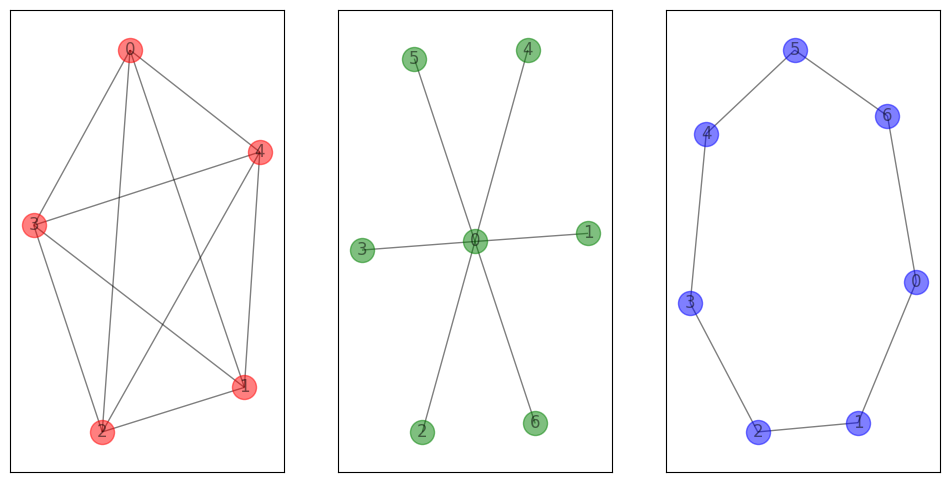

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Create three separate graphs
G1 = nx.complete_graph(5)
G2 = nx.star_graph(6)
G3 = nx.cycle_graph(7)

# Combine the three graphs into one graph
G = nx.compose_all([G1, G2, G3])

# Visualize the combined graph
plt.figure(figsize=(12, 6))

# Position each graph to display them separately
pos_G1 = nx.spring_layout(G1, seed=42)
pos_G2 = nx.spring_layout(G2, seed=42)
pos_G3 = nx.spring_layout(G3, seed=42)

# Draw each graph separately
nx.draw_networkx(G1, pos=pos_G1, node_color='r', node_size=300, with_labels=True, alpha=0.5, ax=plt.subplot(131))
nx.draw_networkx(G2, pos=pos_G2, node_color='g', node_size=300, with_labels=True, alpha=0.5, ax=plt.subplot(132))
nx.draw_networkx(G3, pos=pos_G3, node_color='b', node_size=300, with_labels=True, alpha=0.5, ax=plt.subplot(133))

# Draw edges of the combined graph
nx.draw_networkx_edges(G, pos=pos_G1, ax=plt.gca(), alpha=0.3, edge_color='black')

plt.tight_layout()
plt.show()


In [ ]:
# other test graph
#G = nx.Graph() 
#G.add_nodes_from(['A1', 'B1', 'B2', 'C1', 'C2', 'C3'])
#G.add_edges_from([
   # ('A1', 'B1'), ('A1', 'B2'), ('A1', 'C1'), ('A1', 'C2'), ('A1', 'C3'), ('B1', 'C1'),
    #('B2', 'C2'), ('B2', 'C3')])

In [6]:
def is_complete_graph(G):
    """
    Check if a graph is complete.

    Parameters:
    - G: NetworkX graph

    Returns:
    - True if the graph is complete, False otherwise
    """
    for node in G:
        if len(G[node]) != len(G) - 1:
            return False
    return True

def is_same_connections(graph, node1, node2):
    """
    Checks if two nodes have the same connections in a graph.
    
    Parameters:
    - graph: NetworkX graph
    - node1: node identifier
    - node2: node identifier
    
    Returns:
    - bool: True if nodes have the same connections, False otherwise
    """
    return (graph.neighbors(node1)) == set(graph.neighbors(node2))


def find_complete_subgraphs(G, current_graph, tree, last_node):
    """
    Creates a tree of complete subgraphs of a connected graph
    Please make sure to only insert connected graphs into this function
    
    Parameters:
    - G: NetworkX graph
    - current_graph: list of nodes
    - tree: NetworkX DiGraph
    - last_node: last node added to the tree
    
    Returns:
    - None
    """

        
        
    if last_node == 0:
        if is_complete_graph(G.subgraph(current_graph)):
            try:
                name = ''.join(current_graph)
                tree.add_node(name)
            except:
                # if number for example
                name = str(current_graph)
            tree.add_node(name)


        else:
            most_connected_node = max(current_graph, key=lambda x: len(G[x]))
            print(most_connected_node)
            edited_graph = G.copy()
            tree.add_node(most_connected_node)  
            last_node = most_connected_node
            edited_graph.remove_node(most_connected_node)
            for current_subgraph in nx.connected_components(edited_graph):
                find_complete_subgraphs(G, current_subgraph, tree, last_node)
    else:  

        if is_complete_graph(G.subgraph(current_graph)):
            name = ''.join(current_graph)
            tree.add_node(name)
            tree.add_edge(last_node, name)
        else:
            most_connected_node = max(current_graph, key=lambda x: len(G[x]))
            print(most_connected_node)
            edited_graph = G.subgraph(current_graph).copy()
            tree.add_node(most_connected_node)
            tree.add_edge(last_node, most_connected_node)
            last_node = most_connected_node
            edited_graph.remove_node(most_connected_node)
            for current_subgraph in nx.connected_components(edited_graph):
                find_complete_subgraphs(G, current_subgraph, tree, last_node)
    return


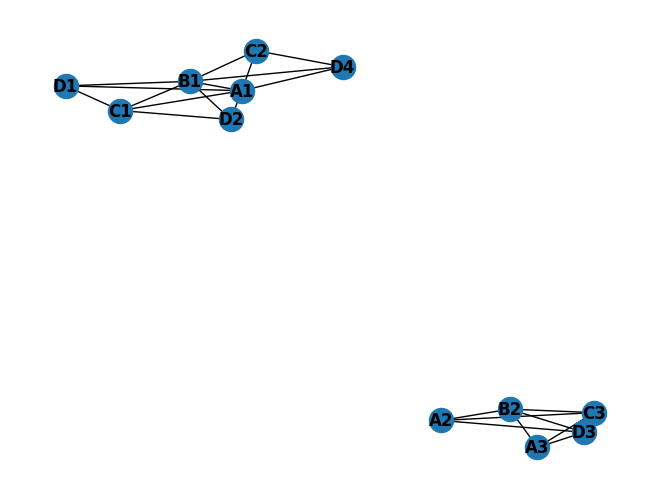

In [33]:
nx.draw(G, with_labels=True, font_weight='bold')

A1
B1
C1
['A1', 'B1', 'C1', 'D1', 'D2', 'C2D4']
[('A1', 'B1'), ('B1', 'C1'), ('B1', 'C2D4'), ('C1', 'D1'), ('C1', 'D2')]
---
C3
D3
B2
['C3', 'D3', 'B2', 'A3', 'A2']
[('C3', 'D3'), ('D3', 'B2'), ('B2', 'A3'), ('B2', 'A2')]
---


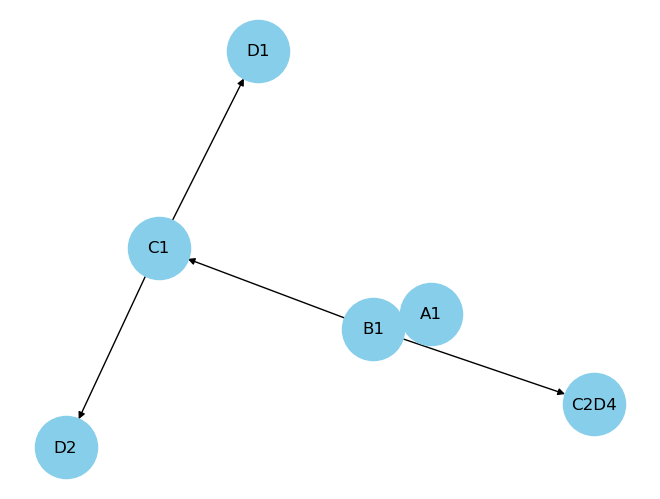

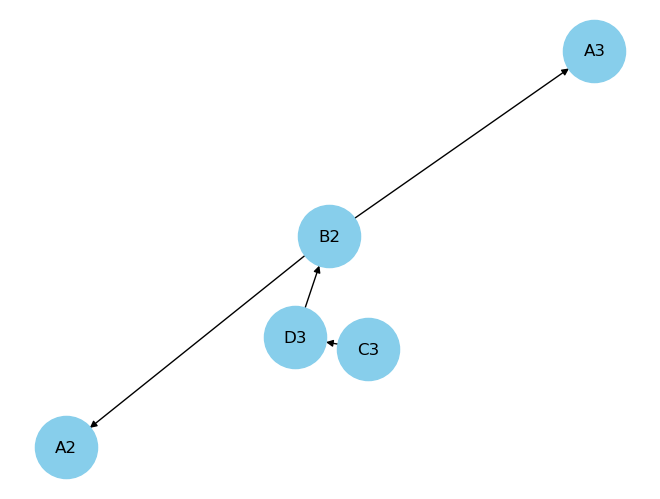

In [7]:
trees = []
for g in nx.connected_components(G):
    tree = nx.DiGraph()
    graph = G.subgraph(g)
    find_complete_subgraphs(graph, graph, tree, 0)
    #nx.draw(tree, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
    # print all trees visually
    print(tree.nodes)
    print(tree.edges)
    print('---')
    
    trees.append(tree)
    
for tree in trees:
    nx.draw(tree, with_labels=True, node_color='skyblue', node_size=2000, arrows=True)
    plt.show()


In [ ]:

    
# print all trees visually 

